<a href="https://colab.research.google.com/github/lasyaEd/DeepLearning/blob/main/Lab9_RNN_ledunuri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Sequence & RNNs

###  **DSBA 6165: AI & Deep Learning**


## Goal

The goal of this lab activity is practicing sequence and language models. We practice to build a recurrent neural networks and apply to text data.

**Before start, you need to install pydot and graphviz and restart the kernel.**
You can the following command for it.

> pip install pydot
<br/>
> pip install graphviz

Let us first import the libraries we are going to use. TensorFlow for DL models, matplotlib and seaborn for plotting data/results, numpy and pandas for data handling.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, datasets
print("TF version:", tf.__version__)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

%matplotlib inline

TF version: 2.18.0


# Sequence Model

Let us create data with 4 samples in a window sliding one step at a time.

![](https://webpages.charlotte.edu/mlee173/teach/ml/images/class/AIDL-Lab9_features.png)

In [2]:
embedding = 4   # embedding dimension for autoregressive model T = 1000
                # generate a total of 1000 points
T = 1000
time = np.arange(0,T)
x = np.sin(0.01 * time) + 0.2 * np.random.normal(size=T)

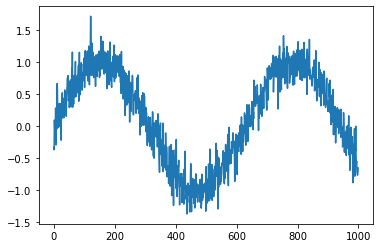

In [ ]:
plt.plot(time, x);

In [3]:
features = np.zeros((T-embedding, embedding))
for i in range(embedding):
    features[:,i] = x[i:T-embedding+i]
labels = x[embedding:]

ntrain = 600
x_train, t_train = features[:ntrain,:], labels[:ntrain]
x_test, t_test = features[ntrain:,:], labels[ntrain:]

### TODO 1

1. Create a simple neural network model with the following :
      * Input layer with 4 input features
      * Three hidden layers with 10 units each and ReLU activation function having kernel_initializer as "glorot_normal"
      * Output layer with 1 unit and no activation function  having kernel_initializer as "glorot_normal"
      
2. Print the model summary
3. Using `compile`, prepare your model to have "Adam" as an `optimizer`, have a `loss` function to be "mse" and `metrics` as 'mse' and 'mae'.


In [4]:
#TODO
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ff_model = Sequential([
    Dense(10, activation='relu', kernel_initializer='glorot_normal', input_shape=(embedding,)),
    Dense(10, activation='relu', kernel_initializer='glorot_normal'),
    Dense(10, activation='relu', kernel_initializer='glorot_normal'),
    Dense(1, activation=None, kernel_initializer='glorot_normal')
])

ff_model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
ff_model.summary()








/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

### TODO 2
1. Using `fit`, train the model with training data (`x_train` and `t_train`) for 10 epochs, and `validation_data` be a tuple of `x_test` and `t_test`.

In [5]:
# TODO

history = ff_model.fit(x_train, t_train, epochs=10, validation_data=(x_test, t_test))




Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.5088 - mae: 0.6128 - mse: 0.5088 - val_loss: 0.1235 - val_mae: 0.2938 - val_mse: 0.1235
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3556 - mae: 0.4911 - mse: 0.3556 - val_loss: 0.0739 - val_mae: 0.2199 - val_mse: 0.0739
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3315 - mae: 0.4588 - mse: 0.3315 - val_loss: 0.0593 - val_mae: 0.1917 - val_mse: 0.0593
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2933 - mae: 0.4309 - mse: 0.2933 - val_loss: 0.0569 - val_mae: 0.1880 - val_mse: 0.0569
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2657 - mae: 0.4058 - mse: 0.2657 - val_loss: 0.0557 - val_mae: 0.1868 - val_mse: 0.0557
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2503 - mae: 0.3975 - mse: 0.2503 - val_loss: 0.0547 - val_mae: 0.1857 - val_mse: 0.0547
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2472 - mae: 0.3920 - mse: 0.2472 - val_loss: 0.0537

### TODO 3

Now we have to create a **plot_res** function which plots the time-series data and an estimate of the data based on embedding technique
1. This function has four arguments: `time`, `x`, `estimates`, and `embedding`.
1. Using `plt.plot` plot the time-series data stored in the `x` array against the corresponding `time` steps stored in the time array and `label` the line as "data"
1. Using `plt.plot` plots the estimates of the time-series data stored in the `estimates` array against the corresponding time steps stored in the time array, but only for **time steps after the embedding** index, and `label` the line as `estimate`
1. end the function using `plt.legend()`

In [6]:
def plot_res(time, x, estimates, embedding):
    """
    Plot the original time-series data and the model's estimates.

    Args:
        time (array): Time steps
        x (array): Original time-series data
        estimates (array): Predicted values (estimates)
        embedding (int): Number of lag steps used for prediction
    """
    plt.figure(figsize=(10, 4))
    plt.plot(time, x, label="data")
    plt.plot(time[embedding:], estimates, label="estimate")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title("Time-Series and Estimates")
    plt.legend()
    plt.grid(True)
    plt.show()






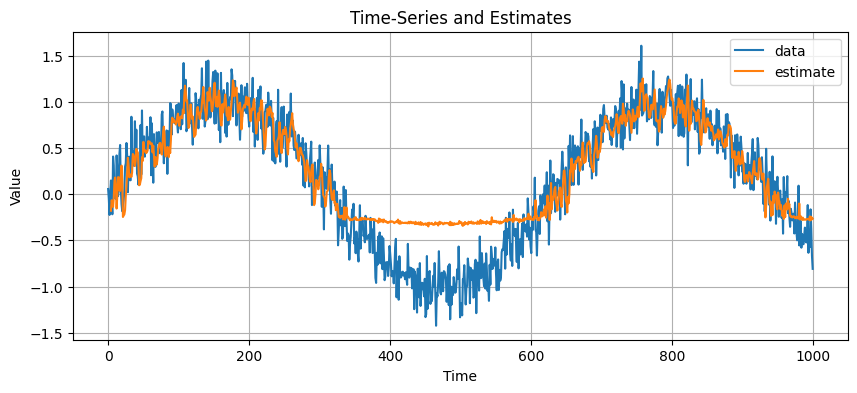

In [8]:
estimates = ff_model(features)
plot_res(time, x, estimates, embedding)

## Multistep Prediction

As in the textbook, we can reuse the previous predictions to predict the following steps after stop feeding the data, thus

$$
\begin{split}\hat{x}_{605} = f(x_{601}, x_{602}, x_{603}, x_{604}), \\
\hat{x}_{606} = f(x_{602}, x_{603}, x_{604}, \hat{x}_{605}), \\
\hat{x}_{607} = f(x_{603}, x_{604}, \hat{x}_{605}, \hat{x}_{606}),\\
\hat{x}_{608} = f(x_{604}, \hat{x}_{605}, \hat{x}_{606}, \hat{x}_{607}),\\
\hat{x}_{609} = f(\hat{x}_{605}, \hat{x}_{606}, \hat{x}_{607}, \hat{x}_{608}),\\
\ldots\end{split}
$$


### TODO 4

Now we have to perform time series forecasting using a model that takes embedding lagged values of the time series as input and plot the results.
1. Create a variable called `predictions` and fill it with a numpy array of zeros the same size as the `estimates` array.
1. Now set first `(ntrain - embedding)` values of predictions equal to the first `(ntrain - embedding)` values of `estimates`
1. write a for loop which run from range of `(ntrain - embedding)` to `(T - embedding)`
    * In each iteration, The model should predict the next value based on the previous `embedding` values. The predicted value should stored in the predictions array. Also using `reshape` function, reshape it to (1,-1).
1. Exit the loop and plot the results using `plot_res` function which created above
    * HINT: plot the true values (x), the predicted values (predictions), and the embedding used by the model and time.

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━

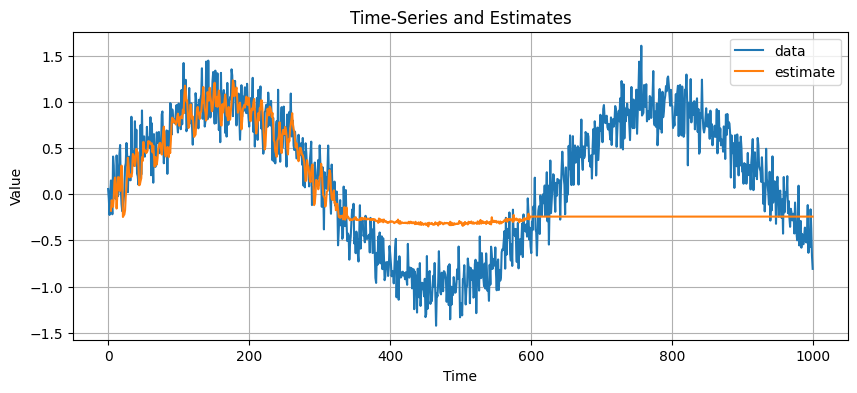

In [14]:
# TODO
# Step 1: Initialize predictions array
predictions = np.zeros(T - embedding)

# Step 2: Copy the known estimate values for initial part
predictions[:ntrain - embedding] = ff_model.predict(x_train[:ntrain - embedding]).flatten()


# Step 3: Forecast iteratively
for i in range(ntrain - embedding, T - embedding):
    # Get the previous embedding values (from predictions so far)
    last_values = predictions[i - embedding:i]

    # Reshape to (1, -1) to feed into model
    input_seq = last_values.reshape(1, -1)

    # Predict next value
    next_value = ff_model.predict(input_seq)[0, 0]

    # Store in predictions array
    predictions[i] = next_value

# Visualize full time-series with predictions
plot_res(time, x, predictions, embedding)







As we observed above, the predictions decay a constant value after a few steps because of the accumulated errors. Now, let us see how difficult $k$-step-ahead predictions are.

(935, 65)


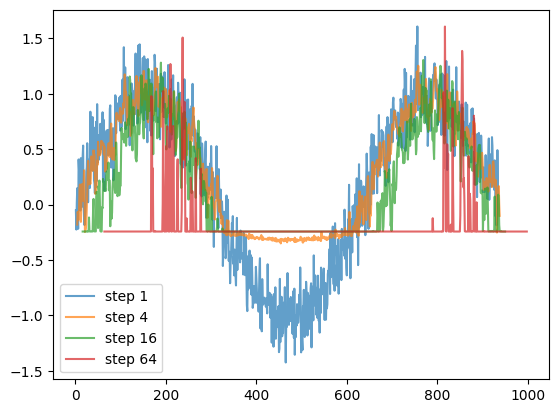

In [15]:
# based on the textbook code
# produce the k-step prediction
def k_step_pred(k, x, embedding, T):
    features = np.zeros((T-k, k))
    for i in range(embedding):
        features[:,i] = x[i:T-k+i]
    for i in range(embedding, k):
        features[:,i] = ff_model(features[:,(i-embedding):i]).numpy().reshape((-1))
    return features

k = 65
preds = k_step_pred(k, x, embedding, T)
print(preds.shape)
for i in (1, 4, 16, 64):
    plt.plot(time[i:T-k+i], preds[:,i], label=('step ' + str(i)), alpha=0.7)
plt.legend();

# Language Model

## Text Data

Now, we will play with the text of H.G. Wells' novel "The Time Machine" (http://www.gutenberg.org/ebooks/35/). This book contains only over 30,000 words for us to play with here.

![](https://www.gutenberg.org/cache/epub/35/pg35.cover.medium.jpg)

Let us save the text "The Time Machine" to a local file named "timemachine.txt" from the Project Gutenberg website. The text file is located in this URL.

In [16]:
file_url = "https://www.gutenberg.org/files/35/35-0.txt"

### TODO 5

1. Using the `requests` library [reference_link](https://pypi.org/project/requests), send an HTTP GET request to the URL specified in url. use `allow_redirects=True` argument which allows redirects to be followed automatically.
1. open a file called "timemachine.txt" in binary write mode ('wb'), and using `write` write the contents of the server's response (`r.content`) to the file.

In [19]:
# TODO5-1
import requests

url = "https://www.gutenberg.org/files/35/35-0.txt"
r = requests.get(url, allow_redirects=True)




1. Using `with` `open` to open the file "timemachine.txt" in the current directory, and assigns a file object "f" to it.
1. Reads the entire contents of the file into the `text_data` variable using `read()`

In [22]:
# TODO5-2

with open("timemachine.txt", "wb") as f:
    f.write(r.content)

with open("timemachine.txt", "r", encoding='utf-8') as f: # Open in read mode with UTF-8 encoding
    text_data = f.read()



## Preprocessing

We can use `re` regular expression library to first convert non-alphabetical characters space and then convert all letters to lower case. Follow the codes below ask questions if you need further help.  

In [23]:
import re

text = re.sub('[^A-Za-z]+', ' ', text_data).lower()

print(text_data[:100])
print("\n\n")
print(text[:100])

﻿The Project Gutenberg eBook of The Time Machine, by H. G. Wells

This eBook is for the use of anyon



 the project gutenberg ebook of the time machine by h g wells this ebook is for the use of anyone an


### Tokenizing
Tokenization is breaking the raw text into small chunks. Tokenization breaks the raw text into words, sentences called tokens. These tokens help in understanding the context or developing the model for the NLP. The tokenization helps in interpreting the meaning of the text by analyzing the sequence of the words.
For example, the text “It is raining” can be tokenized into ‘It’, ‘is’, ‘raining’

There are different methods and libraries available to perform tokenization. NLTK, Gensim, Keras are some of the libraries that can be used to accomplish the task.

There are various tokenization techniques available which can be applicable based on the language and purpose of modeling. Below are a few of the tokenization techniques used in NLP.

![Screenshot%202023-03-13%20at%2011.51.08%20AM.png](attachment:Screenshot%202023-03-13%20at%2011.51.08%20AM.png)

Here are some instructions for manually tokenizing a text:
  * Identify the type of tokenization you want to use: There are different types of tokenization such as word-based, sentence-based, or character-based. Choose the type of tokenization that is most appropriate for your task.
  * Remove any unwanted characters: Before you begin tokenizing, remove any unwanted characters such as punctuation marks or special characters that are not part of the text (See Preprocessing above).
  * Identify the boundary of the tokens: For word-based tokenization, the boundary is usually a space or a punctuation mark. For sentence-based tokenization, the boundary is usually a period, question mark, or exclamation mark.
  * Use a delimiter to separate tokens: Once you have identified the boundary of the tokens, use a delimiter such as a space or a comma to separate the tokens.
  * Handle special cases: There may be cases where a word or phrase should not be split into separate tokens. For example, "New York" should be treated as a single token in most cases. You may need to manually identify and handle such cases.



For character level tokenization, we can simply convert the string text to list as below.

In [24]:
list(text)[:10]

[' ', 't', 'h', 'e', ' ', 'p', 'r', 'o', 'j', 'e']

### TODO 6
1. Run word-based tokenization using `split()` method. Show the first 10 words from the word tokens.

In [25]:
t_test = text.split()
t_test[:10]


['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'the',
 'time',
 'machine',
 'by',
 'h']

Note that manual tokenization can be time-consuming and may not be suitable for large volumes of text. There are automated tools and libraries available for tokenization that can save time and improve accuracy. NLTK is one of those tools, so let us play with it. Let us first import nltk and download `punkt` sentence tokenizer.  

In [28]:
import nltk
#nltk.download('popular')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

### TODO 7

1. Tokenize a text using `nltk.word_tokenize` and store to a variable called `tokens`.

In [29]:
# TODO
tokens = nltk.word_tokenize(text)

Now we can see the first 10 tokens, which is identical to the previous results.

In [30]:
tokens[:10]

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'the',
 'time',
 'machine',
 'by',
 'h']

Now, let us examine the distributions of the tokens using `nltk.FreqDist`, which shows the freqencies of each word in the text. We can repeat this for bigrams and trigrams (two or three consecutive words).  

In [31]:
fdist = nltk.FreqDist(tokens)
fdist

FreqDist({'the': 2477, 'and': 1312, 'of': 1286, 'i': 1268, 'a': 877, 'to': 766, 'in': 606, 'was': 554, 'that': 458, 'it': 452, ...})

In [32]:
fdist2 = nltk.FreqDist(nltk.bigrams(tokens))
fdist2

FreqDist({('of', 'the'): 344, ('in', 'the'): 192, ('i', 'had'): 130, ('and', 'the'): 112, ('i', 'was'): 112, ('the', 'time'): 110, ('to', 'the'): 101, ('it', 'was'): 99, ('project', 'gutenberg'): 88, ('as', 'i'): 78, ...})

In [33]:
fdist3 = nltk.FreqDist(nltk.trigrams(tokens))
fdist3

FreqDist({('the', 'time', 'traveller'): 63, ('project', 'gutenberg', 'tm'): 57, ('the', 'time', 'machine'): 34, ('the', 'project', 'gutenberg'): 33, ('the', 'medical', 'man'): 24, ('gutenberg', 'tm', 'electronic'): 18, ('it', 'seemed', 'to'): 16, ('it', 'was', 'a'): 15, ('here', 'and', 'there'): 15, ('the', 'united', 'states'): 14, ...})

If we plot the frequencies in an original scae, we can see the following curve, hard to read. It kind of tells us that there are few words are highly frequent than the rest of words. You may notice what are they.

<Axes: xlabel='Samples', ylabel='Counts'>

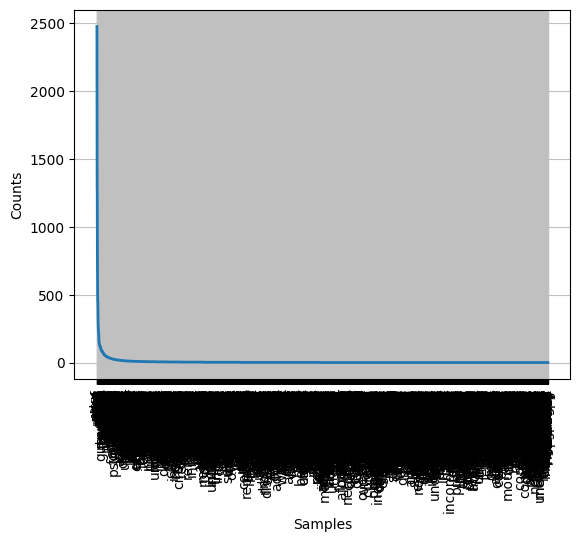

In [34]:
fdist.plot()

Now, let us create log-log plot that convert both x and y axis into log scale to see the relation. From this plot, we can observe the phenomena called Zipf's law, saying the frequency $n_i$ of the $i^\text{th}$ most frequent word is
$$
n_i \propto \frac{1}{i^\alpha}
$$
In log-scale, we can rewrite this as
$$
\log n_i = -\alpha \log i + c,
$$
which are exactly what we observe from the plot below.

<ipython-input-35-3c524734d2fc>:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.arange(len(x))),


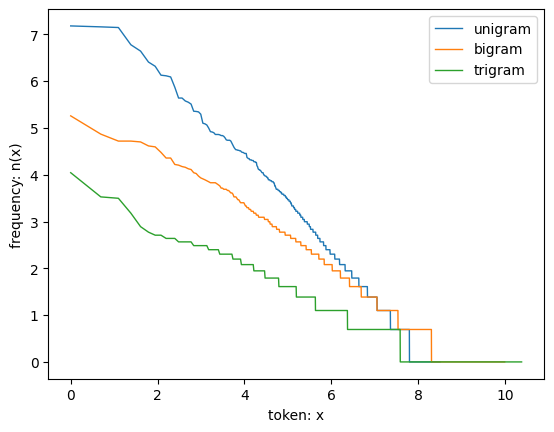

In [35]:
def log_log_plot(x, slabel):
    plt.plot(np.log(np.arange(len(x))),
             np.log(np.sort(x)[::-1]),
             linewidth=1, label=slabel)


unigram_freqs = [freq for token, freq in fdist.items()]
bigram_freqs = [freq for token, freq in fdist2.items()]
trigram_freqs = [freq for token, freq in fdist3.items()]
# x = np.log(np.arange(len(unigram_freqs)))
log_log_plot(unigram_freqs, 'unigram')
log_log_plot(bigram_freqs, 'bigram')
log_log_plot(trigram_freqs, 'trigram')
plt.xlabel('token: x')
plt.ylabel('frequency: n(x)')
plt.legend()


# Recurrent Neural Networks

## Loading gender names data from NLTK



### TODO 8

1. Create a variable `male_names` and extract male names from the names corpus using the `words("male.txt")` function
1. Creates a list `male_labels` with a length equal to the number of male names, and initializes each element to 0.
    * Hint: Multiplying a list duplicate the element by the constant. For instance, [5] * 5 => [5, 5, 5, 5, 5]
1. Create a variable `female_names` and extract male names from the names corpus using the `words("female.txt")` function
1. Create a list `female_labels` with a length equal to the number of female names and initialize each element to

    * Hint: Multiplying a list duplicate the element by the constant.
1. Now concatenate the `male_names` and `female_names` lists into a single list `X` of all names, and concatenate the male_labels and female_labels lists into a single list `y` of all labels.

In [36]:
# TODO
from nltk.corpus import names
nltk.download('names')

male_names  = names.words('male.txt')
male_labels = [0] * len(male_names)
female_names = names.words('female.txt')
female_labels = [1] * len(female_names)

X = male_names + female_names
y = male_labels + female_labels

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


Let us check the content of data `X` and `y` by looking at the first and last 5 elements in them.

In [37]:
X[:5], y[:5], X[-5:], y[-5:]

(['Aamir', 'Aaron', 'Abbey', 'Abbie', 'Abbot'],
 [0, 0, 0, 0, 0],
 ['Zorine', 'Zsa Zsa', 'Zsazsa', 'Zulema', 'Zuzana'],
 [1, 1, 1, 1, 1])

### TODO 9

1. Using `train_test_split`, divide the data into `X_train_raw`, `X_test_raw`, `y_train`, `y_test` with `X` and `y` as inputs. Set `test_size` to 0.2 and `random_state` to 42.

In [38]:
# TODO
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Train data: {len(X_train_raw)}, Test data: {len(X_test_raw)}")

Train data: 6355, Test data: 1589


## Tokenizing

### TODO 10
1. Create a new `tokenizer` object using `Tokenizer` and set the `char_level` parameter to `True`.
1. Now let us fit the `tokenizer` we created above on the training data `X_train_raw` using `fit_on_texts()`

In [39]:
# TODO

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(X_train_raw)





Now, we can look at the corpus dictionary (in this case, dictionary consists of characters), showing the mapping of characters (or words) and corresponding numbers.

In [40]:
tokenizer.word_index

{'a': 1,
 'e': 2,
 'i': 3,
 'n': 4,
 'r': 5,
 'l': 6,
 'o': 7,
 't': 8,
 's': 9,
 'd': 10,
 'y': 11,
 'm': 12,
 'h': 13,
 'c': 14,
 'b': 15,
 'u': 16,
 'g': 17,
 'k': 18,
 'v': 19,
 'j': 20,
 'f': 21,
 'p': 22,
 'w': 23,
 'z': 24,
 'x': 25,
 'q': 26,
 '-': 27,
 ' ': 28,
 "'": 29}

### TODO 11
1. Create a varible `vocab_size` and calculate the size of the vocabulary that the `tokenizer` has.
    * Hint:
        * use `len`  function for getting length of the tokenizer's word_index and add "+1"


In [41]:
# TODO
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary Size: {vocab_size}")

Vocabulary Size: 30


### Text to Sequences
Now let us use `tokenizer` to convert the raw text data to sequences of integers.

### TODO 12
1. Create `X_train_seq` using the `texts_to_sequences()` method of the `tokenizer` to convert the raw text data `X_train_raw` into sequences of integers.


In [43]:
X_train_seq = tokenizer.texts_to_sequences(X_train_raw)
print(f"{X_train_raw[:5]}\n{X_train_seq[:5]}")

['Hannibal', 'Christel', 'Johny', 'Linzy', 'Jeramie']
[[13, 1, 4, 4, 3, 15, 1, 6], [14, 13, 5, 3, 9, 8, 2, 6], [20, 7, 13, 4, 11], [6, 3, 4, 24, 11], [20, 2, 5, 1, 12, 3, 2]]


As you can see, the first line shows the first five samples of the raw text data, and the second line shows the first five integer sequences corresponding to those samples. The integer sequences are a way of representing the text data in a more compact and standardized format that can be fed into machine learning models for training and prediction since RNN models cannot deal with nonnumerical input as it is.

### Padding

Now, let us take look at the numerical sequences that we created above. Checking the lengths of each are quite variant as shown in the following figure. This can be difficult for a neural network to deal with as it expects identical size for the input. So, we consider "padding" here.

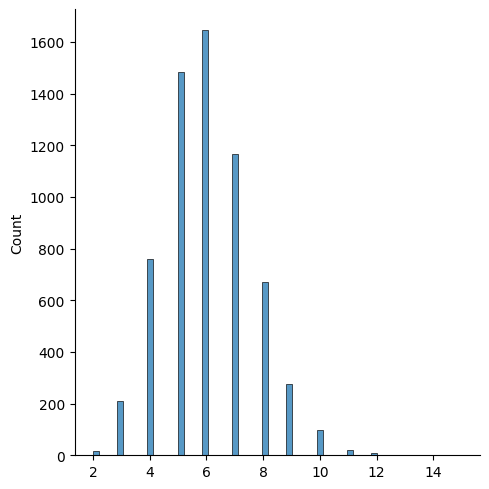

In [44]:
names_lens = [len(n) for n in  X_train_seq]
names_lens

sns.displot(names_lens)
#print(X_train[np.argmax(names_lens)])  # longest name

In [45]:
max_len = np.max(names_lens)
max_len

np.int64(15)

### TODO 13

1. Create a variable called `X_train` and use `sequence.pad_sequences()` function and pass two arguments: `X_train_seq`, and `maxlen` as `max_len`.
2. Display the first 10 samples of the padded integer sequence data using slicing notation.

In [46]:
from tensorflow.keras.preprocessing import sequence

# TODO
X_train = sequence.pad_sequences(X_train_seq, maxlen=max_len)
X_train[:10]

array([[ 0,  0,  0,  0,  0,  0,  0, 13,  1,  4,  4,  3, 15,  1,  6],
       [ 0,  0,  0,  0,  0,  0,  0, 14, 13,  5,  3,  9,  8,  2,  6],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  7, 13,  4, 11],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  3,  4, 24, 11],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 20,  2,  5,  1, 12,  3,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 10,  2,  5,  5,  7,  6],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 18,  1,  4,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 14,  6,  1, 16, 10,  3,  2],
       [ 0,  0,  0,  0,  0,  0, 23,  3,  6,  6,  1, 12,  3,  4,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  2,  4,  1]],
      dtype=int32)

### TODO 14
1. Referring to the previous TODO, create `X_test` similar to `X_train`, this time by using `X_test_raw`.
2. Convert `y_train` to numpy array.
3. Convert `y_test` to numpy array.

In [47]:
# TODO
X_test = sequence.pad_sequences(tokenizer.texts_to_sequences(X_test_raw), maxlen=max_len)


y_train = np.array(y_train)
y_test = np.array(y_test)


In [48]:
X_train.shape, X_test.shape

((6355, 15), (1589, 15))

## RNN

### TODO 15

1. Create a `rnn` model using keras.Sequential() and add following layers
    * add `layers.Embedding` having `input_dim` equal to vocab_size ,`output_dim` as EMBEDDING_DIM , `input_length` as `max_len` and keep `mask_zero` as True
    * add `SimpleRNN` which should have 16 units and uses ReLU activation function and name the layer as "RNN_layer"
    * add `Dense` which should have 16 units and uses ReLU activation function and name the layer as "dense_layer".
    * add another layer `Dense`  which should have  single unit and uses sigmoid activation function and name the layer as "output".
1. Print the summary of the model.
1. Using `compile`, prepare your model to have "adam" as an optimizer, have a loss function to be "binary_crossentropy" also it should take metrics as "accuracy".

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Parameters (adjust as needed)
vocab_size = 10000
EMBEDDING_DIM = 128
max_len = 100

# Create RNN model
rnn = Sequential()
rnn.add(Embedding(input_dim=vocab_size,
                    output_dim=EMBEDDING_DIM,
                    input_length=max_len,
                    mask_zero=True))
rnn.add(SimpleRNN(16, activation='relu', name="RNN_layer"))
rnn.add(Dense(16, activation='relu', name="dense_layer"))
rnn.add(Dense(1, activation='sigmoid', name="output"))

# Compile model
rnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Build the model by specifying the input shape
# This will determine the shapes of all layers and build the model
rnn.build((None, max_len))  # (None, max_len) represents input shape (batch_size, sequence_length)

# Print model summary
rnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 100, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ RNN_layer (SimpleRNN)                │ (None, 16)                  │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer (Dense)                  │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,282,609 (4.89 MB)

 Trainable params: 1,282,609 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

**If you have not installed pydot and graphviz, please restart the kernel after installing them**

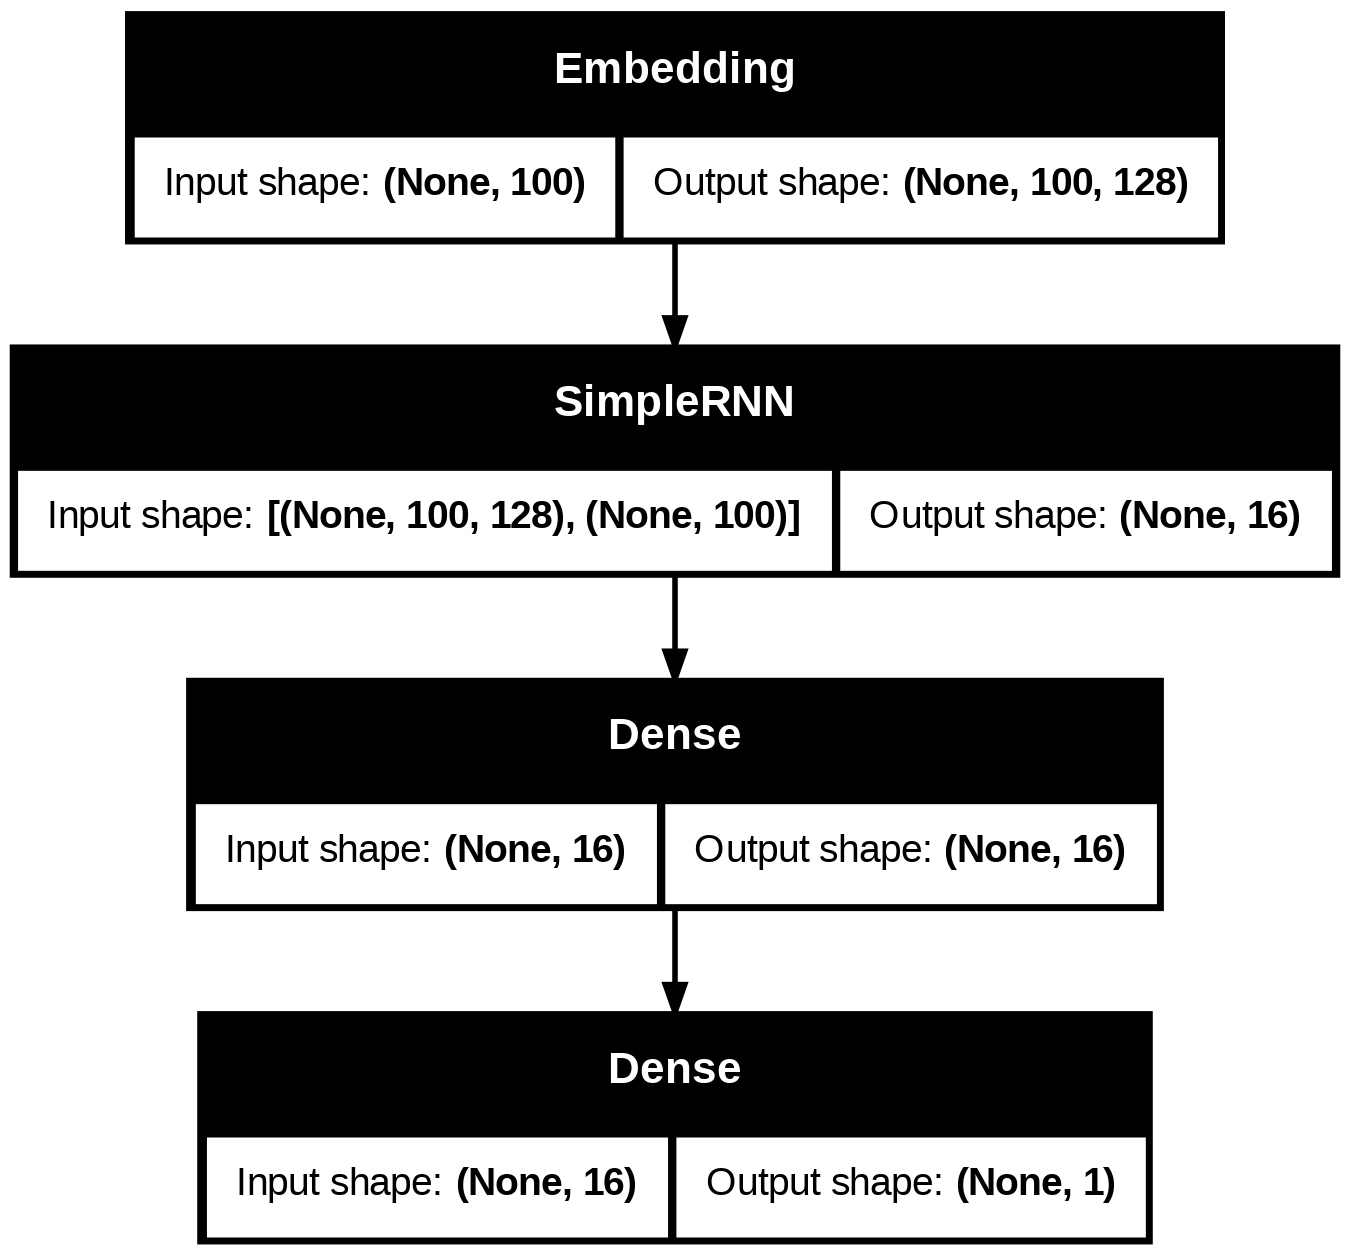

In [72]:
from keras.utils import plot_model

plot_model(rnn, show_shapes=True)

### TODO 15-1

1. Using `fit`, train the model with training data (`X_train` and `y_train`). Keep `batch_size` as `BATCH_SIZE` and `epochs` as `EPOCHS`, `verbose` as 2 and `validation_split` as `VALIDATION_SPLIT` as defined below.

In [65]:
## Hyperparameters
BATCH_SIZE = 128
EPOCHS = 20
VALIDATION_SPLIT = 0.2

history = rnn.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2, validation_split=VALIDATION_SPLIT)







Epoch 1/20
40/40 - 6s - 147ms/step - accuracy: 0.7097 - loss: 0.5931 - val_accuracy: 0.7278 - val_loss: 0.4978
Epoch 2/20
40/40 - 1s - 34ms/step - accuracy: 0.7716 - loss: 0.4606 - val_accuracy: 0.7687 - val_loss: 0.4506
Epoch 3/20
40/40 - 0s - 7ms/step - accuracy: 0.7945 - loss: 0.4291 - val_accuracy: 0.7852 - val_loss: 0.4378
Epoch 4/20
40/40 - 0s - 6ms/step - accuracy: 0.8043 - loss: 0.4170 - val_accuracy: 0.7813 - val_loss: 0.4349
Epoch 5/20
40/40 - 0s - 6ms/step - accuracy: 0.8080 - loss: 0.4099 - val_accuracy: 0.7852 - val_loss: 0.4344
Epoch 6/20
40/40 - 0s - 7ms/step - accuracy: 0.8124 - loss: 0.4044 - val_accuracy: 0.7884 - val_loss: 0.4294
Epoch 7/20
40/40 - 0s - 8ms/step - accuracy: 0.8151 - loss: 0.3985 - val_accuracy: 0.7923 - val_loss: 0.4257
Epoch 8/20
40/40 - 0s - 6ms/step - accuracy: 0.8190 - loss: 0.3919 - val_accuracy: 0.7939 - val_loss: 0.4243
Epoch 9/20
40/40 - 0s - 6ms/step - accuracy: 0.8198 - loss: 0.3892 - val_accuracy: 0.7931 - val_loss: 0.4207
Epoch 10/20
40/4

### TODO 15-2
1. Create `plot_learning` function that plots the training, validation loss and accuracy learning curve using the history argument. You can also refer to the previous lab session to complete this function.


In [66]:
import matplotlib.pyplot as plt

def plot_learning(history):
    """
    Plots training & validation loss and accuracy from the model's history.

    Args:
        history: Keras History object returned by model.fit()
    """
    # Extract metrics
    acc = history.history.get('accuracy')
    val_acc = history.history.get('val_accuracy')
    loss = history.history.get('loss')
    val_loss = history.history.get('val_loss')

    epochs = range(1, len(loss) + 1)

    # Plot Loss
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r--', label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r--', label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


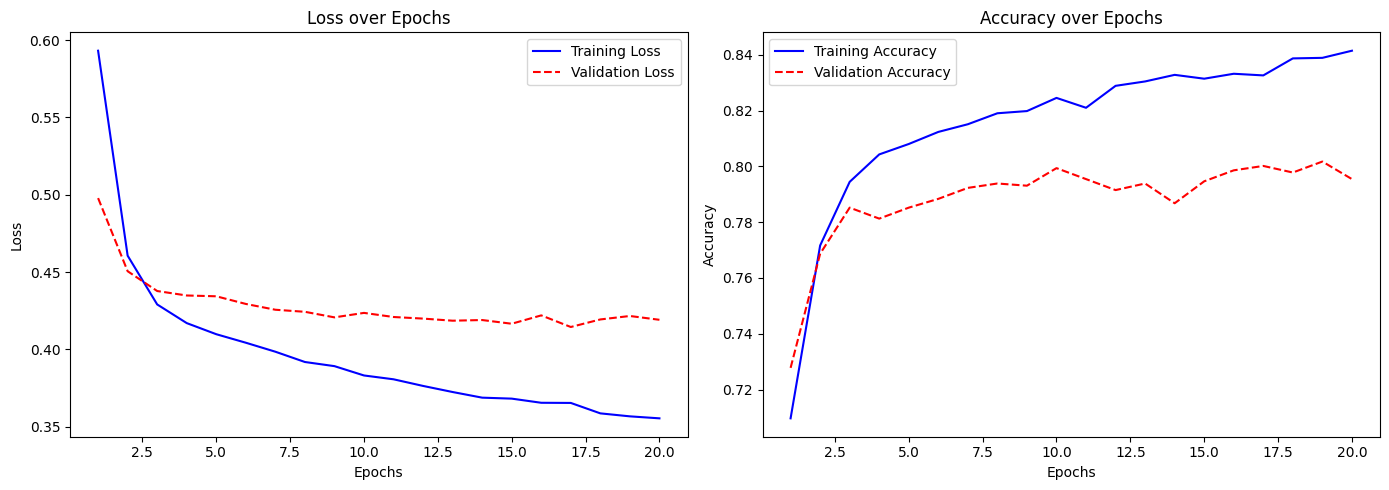

In [67]:
 plot_learning(history)

## Dropout

### TODO 16



1. Define a new model `rnn2` same as `rnn` above.
1. Modify `SimpleRNN` layer to add `dropout` and `recurrent_dropout` as 0.2. `name` the layer as "RNN_layer_Dropout".
1. The rest remains the same.

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Parameters (adjust as needed)
vocab_size = 10000
EMBEDDING_DIM = 128
max_len = 15  # Important to match screenshot

# Create RNN model
rnn2 = Sequential(name="sequential_2")
rnn2.add(Embedding(input_dim=vocab_size,
                    output_dim=EMBEDDING_DIM,
                    input_length=max_len,
                    mask_zero=True,
                    name="embedding_1"))

rnn2.add(SimpleRNN(16, activation='relu', name="RNN_layer_Dropout"))
rnn2.add(Dense(16, activation='relu', name="dense_layer"))
rnn2.add(Dense(1, activation='sigmoid', name="output"))

# Compile model
rnn2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Build model with specified input shape
rnn2.build(input_shape=(None, max_len))

# Print summary
rnn2.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ RNN_layer_Dropout (SimpleRNN)        │ (None, 16)                  │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer (Dense)                  │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,282,609 (4.89 MB)

 Trainable params: 1,282,609 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

### TODO 16-1

1. Using `fit`, train the second model with training data (`X_train` and `y_train`). Keep `batch_size` as `BATCH_SIZE` and `epochs` as `EPOCHS`, `verbose` as 2 and `validation_split` as `VALIDATION_SPLIT` as defined above.

In [69]:

history2 = rnn2.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2, validation_split=VALIDATION_SPLIT)







Epoch 1/20
40/40 - 5s - 128ms/step - accuracy: 0.6794 - loss: 0.6000 - val_accuracy: 0.7364 - val_loss: 0.5071
Epoch 2/20
40/40 - 0s - 6ms/step - accuracy: 0.7626 - loss: 0.4794 - val_accuracy: 0.7718 - val_loss: 0.4649
Epoch 3/20
40/40 - 0s - 7ms/step - accuracy: 0.7827 - loss: 0.4474 - val_accuracy: 0.7773 - val_loss: 0.4526
Epoch 4/20
40/40 - 0s - 7ms/step - accuracy: 0.7915 - loss: 0.4296 - val_accuracy: 0.7899 - val_loss: 0.4447
Epoch 5/20
40/40 - 0s - 11ms/step - accuracy: 0.7998 - loss: 0.4200 - val_accuracy: 0.7884 - val_loss: 0.4338
Epoch 6/20
40/40 - 0s - 11ms/step - accuracy: 0.8035 - loss: 0.4108 - val_accuracy: 0.7860 - val_loss: 0.4286
Epoch 7/20
40/40 - 1s - 19ms/step - accuracy: 0.8076 - loss: 0.4029 - val_accuracy: 0.7923 - val_loss: 0.4236
Epoch 8/20
40/40 - 1s - 24ms/step - accuracy: 0.8122 - loss: 0.3961 - val_accuracy: 0.7923 - val_loss: 0.4242
Epoch 9/20
40/40 - 0s - 12ms/step - accuracy: 0.8145 - loss: 0.3911 - val_accuracy: 0.7868 - val_loss: 0.4236
Epoch 10/20


### TODO 16-2

1. Plot both the training and validation loss, training and validation accuracy curves using the function defined above.

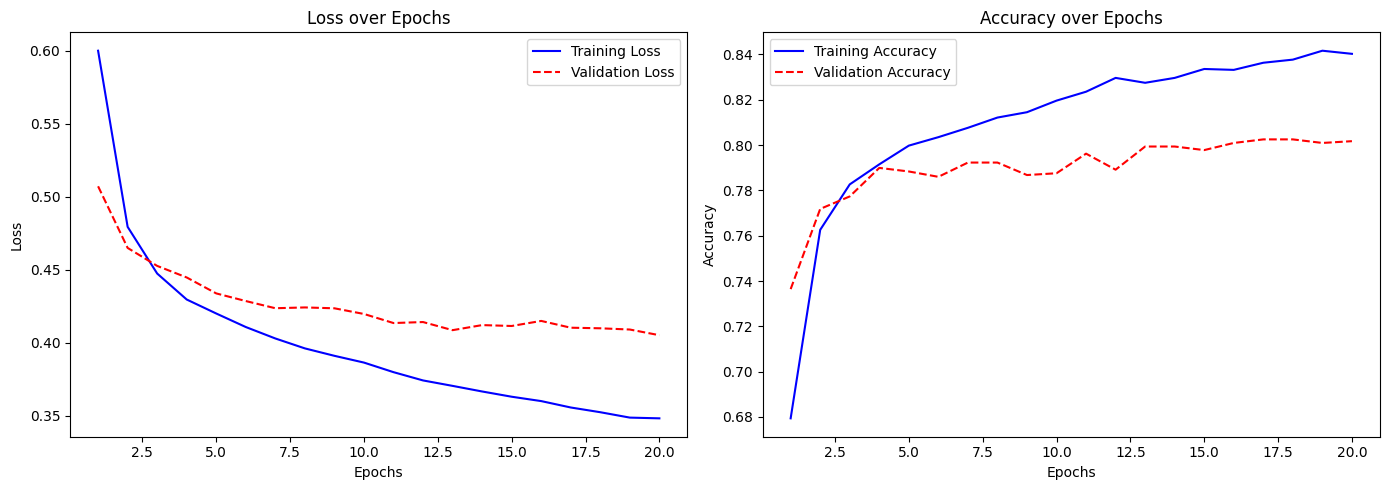

In [70]:
plot_learning(history2)

### TODO 16-3
1. Evaluate `rnn` using `evaluate` on X_test and y_test keeping batch_size as BATCH_SIZE and verbose as 2


In [73]:
rnn.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=2)

13/13 - 2s - 117ms/step - accuracy: 0.6123 - loss: 0.6842


[0.6841932535171509, 0.6123347878456116]

2. Evaluate `rnn2` using `evaluate` on X_test and y_test keeping batch_size as BATCH_SIZE and verbose as 2


In [74]:
rnn2.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=2)

13/13 - 0s - 21ms/step - accuracy: 0.8112 - loss: 0.4012


[0.4012369215488434, 0.8112019896507263]

## Stacking

### TODO 17
1. Define a new model rnn3 same as rnn2 above with these changes.
    * `layers.Embedding` remains same
    * add `layers.SimpleRNN` same as rnn2 add aditional argument "return_sequences" as True
    * add `layers.SimpleRNN` same as rnn2
    * Remove the `layers.Dense` with 16 units
    * add `layers.Dense` with single unit remains same
Rwast remains the same


In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Parameters
vocab_size = 10000
EMBEDDING_DIM = 128
max_len = 15

# Define the new model
rnn3 = Sequential(name="rnn3")
rnn3.add(Embedding(input_dim=vocab_size,
                   output_dim=EMBEDDING_DIM,
                   input_length=max_len,
                   mask_zero=True,
                   name="embedding_1"))

# First RNN layer returns sequences
rnn3.add(SimpleRNN(16, activation='relu', return_sequences=True, name="RNN_layer_1"))

# Second RNN layer processes final output
rnn3.add(SimpleRNN(16, activation='relu', name="RNN_layer_2"))

# Final output layer
rnn3.add(Dense(1, activation='sigmoid', name="output"))

# Compile the model
rnn3.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Build the model with specified input shape
rnn3.build(input_shape=(None, max_len))

# Print summary
rnn3.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "rnn3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ RNN_layer_1 (SimpleRNN)              │ (None, 15, 16)              │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ RNN_layer_2 (SimpleRNN)              │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,282,865 (4.89 MB)

 Trainable params: 1,282,865 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

### TODO 17-1

1. Using `fit`, train the second model with training data (`X_train` and `y_train`). Keep `batch_size` as `BATCH_SIZE` and `epochs` as `EPOCHS`, `verbose` as 2 and `validation_split` as `VALIDATION_SPLIT` as defined above.
1. Plot learning curve using `plot_learning`.

Epoch 1/20
40/40 - 6s - 161ms/step - accuracy: 0.6617 - loss: 0.5855 - val_accuracy: 0.7404 - val_loss: 0.4995
Epoch 2/20
40/40 - 1s - 14ms/step - accuracy: 0.7687 - loss: 0.4693 - val_accuracy: 0.7805 - val_loss: 0.4493
Epoch 3/20
40/40 - 1s - 14ms/step - accuracy: 0.7925 - loss: 0.4317 - val_accuracy: 0.7828 - val_loss: 0.4340
Epoch 4/20
40/40 - 1s - 14ms/step - accuracy: 0.7996 - loss: 0.4159 - val_accuracy: 0.7946 - val_loss: 0.4268
Epoch 5/20
40/40 - 0s - 11ms/step - accuracy: 0.8098 - loss: 0.4050 - val_accuracy: 0.8002 - val_loss: 0.4217
Epoch 6/20
40/40 - 1s - 16ms/step - accuracy: 0.8127 - loss: 0.3962 - val_accuracy: 0.7986 - val_loss: 0.4173
Epoch 7/20
40/40 - 0s - 10ms/step - accuracy: 0.8153 - loss: 0.3917 - val_accuracy: 0.8025 - val_loss: 0.4187
Epoch 8/20
40/40 - 0s - 9ms/step - accuracy: 0.8169 - loss: 0.3864 - val_accuracy: 0.8009 - val_loss: 0.4171
Epoch 9/20
40/40 - 1s - 14ms/step - accuracy: 0.8151 - loss: 0.3822 - val_accuracy: 0.8033 - val_loss: 0.4210
Epoch 10/2

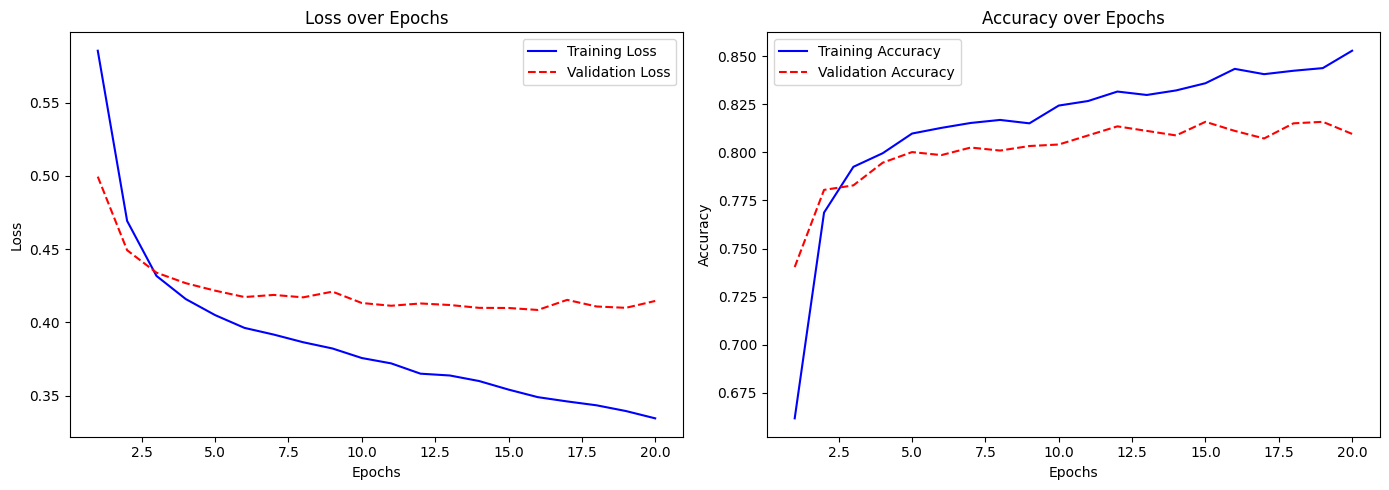

In [76]:
history3 = rnn3.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2, validation_split=VALIDATION_SPLIT)
plot_learning(history3)











### TODO 17-2

1. `evaluate` model on test data (`X_test` and `y_test`) keeping `verbose` as 2 and `bath_size`as BATCH_SIZE

In [77]:
rnn3.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=2)


13/13 - 0s - 32ms/step - accuracy: 0.8099 - loss: 0.4151


[0.4151252806186676, 0.8099433779716492]